In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
seasonSums = pd.read_csv("SeasonSums.csv")
playerGameDate = pd.read_csv("PlayerGameDate.csv")

In [4]:
seasonSums =seasonSums.set_index("Player")
seasonSums.columns

Index(['Position', 'Minutes played', 'Aerial duels', 'Aerial duels accuracy',
       'Aerial duels won', 'Assists', 'Back passes', 'Back passes accuracy',
       'Back passes accurate', 'Back passes percentage', 'Clearances',
       'Conceded goals', 'Crosses', 'Crosses accuracy', 'Crosses accurate',
       'Defensive duels', 'Defensive duels accuracy', 'Defensive duels won',
       'Dribbles', 'Dribbles accuracy', 'Dribbles successful', 'Duels',
       'Duels accuracy', 'Duels won', 'Exits', 'Forward passes',
       'Forward passes accuracy', 'Forward passes accurate',
       'Forward passes percentage', 'Fouls', 'Fouls suffered', 'Goal kicks',
       'Goals', 'Interceptions', 'Long goal kicks', 'Long pass accuracy',
       'Long passes', 'Long passes accurate', 'Long passes percentage',
       'Loose ball duels', 'Loose ball duels accuracy', 'Loose ball duels won',
       'Losses', 'Losses own half', 'Offensive duels',
       'Offensive duels accuracy', 'Offensive duels won', 'Offsid

In [7]:
fieldPlayers = seasonSums[seasonSums.get("Position")!="GK"]
stat = "Dribbles accuracy"
fieldPlayers.get([stat,"Dribbles"]).sort_values(stat, ascending=False)

,Dribbles accuracy,Dribbles
Player,,
McDonnell,0.666667,6
McGee,0.629630,27
Kim,0.628571,35
Carvalho,0.625000,48
Jacobus,0.607143,28
Allen,0.571429,70
Redington,0.555556,18
Gibson,0.551724,29
Iribarren,0.500000,22


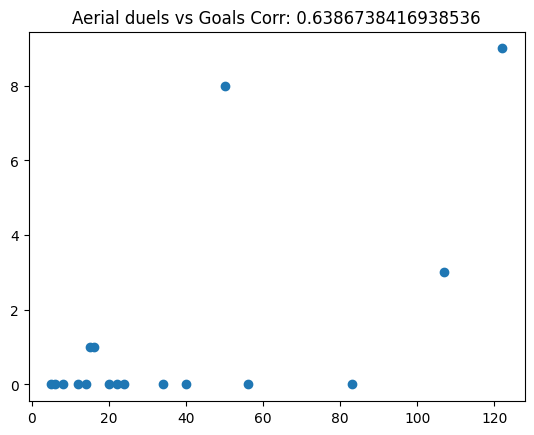

In [8]:
fieldPlayers = seasonSums[seasonSums.get("Position")!="GK"]
stats_ = fieldPlayers.columns.tolist()[2:3]
for stat in stats_:
    plt.scatter(x = fieldPlayers.get(stat),y = fieldPlayers.get("Goals"))
    try:
        slope, intercept, r, p,std_err = stats.linregress(fieldPlayers.get(stat),fieldPlayers.get("Goals"))
        predicted = fieldPlayers.get(stat).apply(predictPoint)
        plt.plot(fieldPlayers.get(stat),predicted)
    except:
        pass
    def predictPoint(x):
        return slope*x+intercept
    
    plt.title(stat+" vs Goals Corr: "+str(r))
    plt.show()

In [55]:
slope, intercept, r, p,std_err = stats.linregress(fieldPlayers.get("Passes to penalty area"),fieldPlayers.get("xA"))
slope

0.07925394333557598

In [33]:
gks = seasonSums[seasonSums.get("Position") == "GK"]
gks = gks.drop(['Assists', 'Back passes', 'Back passes accuracy',
       'Back passes accurate', 'Back passes percentage', 'Crosses', 'Crosses accuracy', 'Crosses accurate',
       'Dribbles', 'Dribbles accuracy', 'Dribbles successful', 'Duels','Exits', 'Forward passes',
       'Forward passes accuracy', 'Forward passes accurate',
       'Forward passes percentage', 'Fouls', 'Fouls suffered', 
       'Goals', 'Interceptions', 'Long goal kicks',
       'Loose ball duels', 'Loose ball duels accuracy', 'Loose ball duels won',
       'Losses', 'Losses own half', 'Offensive duels',
       'Offensive duels accuracy', 'Offensive duels won', 'Offsides',
       'Passes to GK','Passes to GK accurate', 'Passes to final third',
       'Passes to final third accuracy', 'Passes to final third accurate',
       'Passes to final third percentage', 'Passes to penalty area',
       'Passes to penalty area accuracy', 'Passes to penalty area accurate',
       'Progressive runs', 'Received passes', 'Recoveries',
       'Recoveries opp. half', 'Red card', 'Red cards', 'Second assists', 'Short goal kicks',
       'Shot accuracy', 'Shot assists', 'Shots', 
       'Shots on target', 'Sliding tackles', 'Sliding tackles accuracy',
       'Sliding tackles successful', 'Through pass accuracy', 'Through passes',
       'Through passes accurate', 'Total actions', 'Total actions successful',
       'Touches in penalty area', 'Yellow card', 'Yellow cards', 'xA', 'xG'],axis =1)
gks.insert(2,"Save percentage",gks.get("Saves")/gks.get("Shots against"))
gks.insert(3,"xCG-CG",gks.get("xCG")-gks.get("Conceded goals"))
gks.get(["Saves","Saves with reflexes","Save percentage","xCG","Conceded goals","xCG-CG","Aerial duels accuracy"])

,Saves,Saves with reflexes,Save percentage,xCG,Conceded goals,xCG-CG,Aerial duels accuracy
Player,,,,,,,
Shor,6,3,0.600000,3.81,4,-0.19,1.0
Wilson,41,23,0.621212,17.55,25,-7.45,0.8


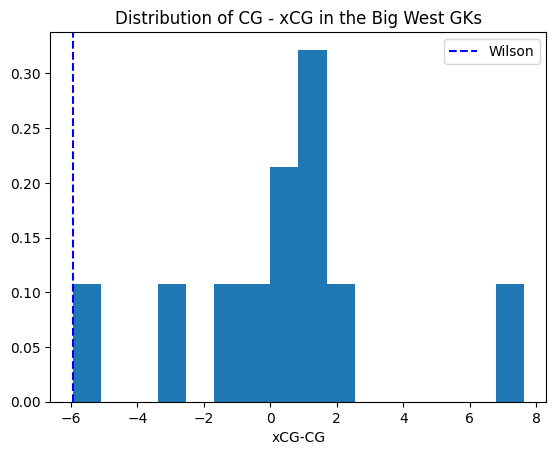

In [50]:
leagueGkDataList = [["Wilson",16,10.06],["Zeller",14,10.82],["Gonzalez",14,15.68],["Learned",8,15.63],["Janssen",10,11.34],["Kadono",14,14.21],["Cook",5,5.4],["Penner",5,6.12],["Limes",9,8.53],["Pruter",7,9.41],["Siegel",3,1.48]]
leagueGkData = pd.DataFrame(leagueGkDataList,columns=["Player","CG","xCG"])
leagueGkData.insert(3,"xCG-CG",leagueGkData.get("xCG")-leagueGkData.get("CG"))
plt.hist(leagueGkData.get("xCG-CG"),bins =16,density=True)
plt.title("Distribution of CG - xCG in the Big West GKs")
plt.xlabel("xCG-CG")
plt.axvline(10.06-16, color="blue", linestyle="--",label = "Wilson")
plt.legend()
plt.show()

In [58]:
seasonSums.get("Crosses accuracy").sort_values()

Player
Arens          0.000000
Hagan          0.000000
Walker         0.000000
Iribarren      0.166667
Kim            0.240000
Place          0.272727
Redington      0.310345
Kawamura       0.333333
Carvalho       0.346154
Gibson         0.368421
Allen          0.411765
McGee          0.421053
Jacobus        0.526316
Valverde       0.560000
Lin            1.000000
McDonnell           NaN
Shor                NaN
Wellerstein         NaN
Wilson              NaN
Name: Crosses accuracy, dtype: float64